Enter the Twitter handle you wish to examine: dyrbert


,Tweets,Date,Likes,RTs
0,@raqbotelho Don’t knock boring. Most “adventur...,2017-10-10 20:17:50,0,0
1,RT @showupforthis: After a sleepless night fac...,2017-10-10 20:15:32,0,286
2,Gin’s good people. Help if you can. https://t....,2017-10-10 20:15:16,1,1
3,RT @showupforthis: 16. Have you been able to d...,2017-10-10 20:14:38,0,2
4,🤢 https://t.co/96YtieaBXV,2017-10-10 20:14:32,1,0
5,Truman show...cause maybe less suffering overa...,2017-10-10 20:14:18,2,1
6,Digital https://t.co/tq0eYHmwdV,2017-10-10 20:13:25,0,0
7,RT @showupforthis: 12. STOP. Zack Morris wants...,2017-10-10 20:13:17,0,8
8,Meh? https://t.co/xKQNskQZsj,2017-10-10 20:13:11,0,0
9,Fly. Reading minds never works out in your fav...,2017-10-10 20:12:57,1,1


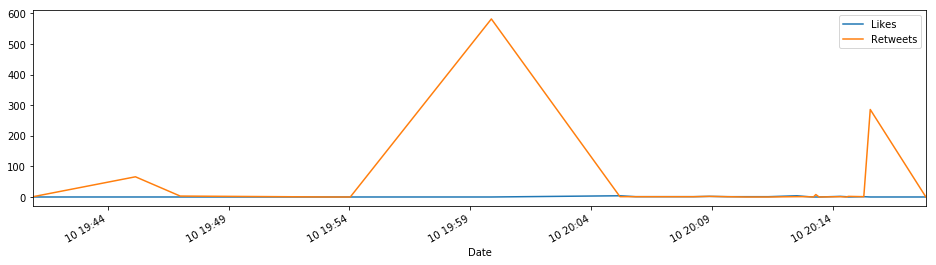

In [4]:
# Getting important libraries
import tweepy
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from credentials import *

def twit_login():
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
    api = tweepy.API(auth)
    return api

extractor = twit_login()

handle = input("Enter the Twitter handle you wish to examine: ")

tweets = extractor.user_timeline(screen_name=handle, count=25)

data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

display(data.head(25))

tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);
